<a href="https://colab.research.google.com/github/Guiara/Airbnb_data_analysis/blob/main/Airbnb_NY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *New York*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Airbnb permite aos indivíduos alugar toda ou parte de sua própria casa, como uma forma de acomodação extra. O site fornece uma plataforma de busca e reservas entre a pessoa que oferece a acomodação para o turista que busca pela locação. Abrange mais de 500 mil anúncios em mais de 35.000 cidades e 192 países.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade *New York*, e ver quais *insights*' podem ser extraídos a partir de dados brutos.**



## Obtenção dos Dados

In [3]:
# importar pacotes necessários
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns


##**Dicionário de Variáveis do *dataset***

* `id` - número de id gerado para identificar o imóvel
* `name` - nome do anúncio
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - nome do anfitrião
* `neighbourhood_group` - região
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de avaliações que a propriedade possui
* `last_review` - data da última avaliação
* `reviews_per_month` - quantidade de avaliações por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` - número avaliações no último mês
* `license`- novo recurso que ainda não foi preenchido (não possível identificar)





##**Análise preliminar dos dados**

In [48]:
# Carregar Base de Dados

df = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2022-12-04/visualisations/listings.csv")

# Análise Preliminar
print('Dimensões do Dataset',
    '\nVariáveis: ',df.shape[1], "\n"
      'Entradas: ', df.shape[0])

# Verificação 03 primeiras entradas
df.head(3)



Dimensões do Dataset 
Variáveis:  18 
Entradas:  41533


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,21,3,2022-08-10,0.03,1,267,1,NaN
1,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2017-07-21,0.73,1,0,0,NaN
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.30,2,322,0,NaN


In [49]:
# Verificação últimas 03 entradas 
df.tail(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
41530,771971759808918693,9B5B Townhouse w/ Elevator & Private Entrance,316920152,Allison,Manhattan,Murray Hill,40.746902,-73.978260,Entire home/apt,3888,2,0,NaN,NaN,8,365,0,NaN
41531,771971822371481471,Huge 9B5B Townhouse w Elevator & Private Entr...,484979380,Natasha,Manhattan,Murray Hill,40.749596,-73.980798,Entire home/apt,3888,2,0,NaN,NaN,2,364,0,NaN
41532,771975190766692224,Lovely Big Studio for Rental Bronx City,426540801,Abul,Bronx,Unionport,40.832824,-73.852371,Entire home/apt,80,3,0,NaN,NaN,2,365,0,NaN


In [50]:
# Tipo de dados
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

  Após verificação dos dados carregados neste *dataset* é possível entender que o mesmo compreende **18 colunas (variáveis) e 4153 entradas** até o presente momento. Dados com muita informação para uma investigação mais profunda e uma análise do contexto, também já é possível notar que existem alguns **dados faltantes** - Listados como **NaN**

In [51]:
# Entendendo Dados Ausentes (NaN)
df.isnull().sum().sort_values(ascending=False)

license                           41532
reviews_per_month                  9393
last_review                        9393
name                                 13
host_name                             5
minimum_nights                        0
number_of_reviews_ltm                 0
availability_365                      0
calculated_host_listings_count        0
number_of_reviews                     0
id                                    0
room_type                             0
longitude                             0
latitude                              0
neighbourhood                         0
neighbourhood_group                   0
host_id                               0
price                                 0
dtype: int64

In [54]:
# Dados ausentes (NaN) em percentual
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)*100

license                           99.997592
reviews_per_month                 22.615751
last_review                       22.615751
name                               0.031300
host_name                          0.012039
minimum_nights                     0.000000
number_of_reviews_ltm              0.000000
availability_365                   0.000000
calculated_host_listings_count     0.000000
number_of_reviews                  0.000000
id                                 0.000000
room_type                          0.000000
longitude                          0.000000
latitude                           0.000000
neighbourhood                      0.000000
neighbourhood_group                0.000000
host_id                            0.000000
price                              0.000000
dtype: float64

Em nosso caso, os dados ausentes observados não precisam de muita atenção. Observando a natureza de nosso conjunto de dados, podemos afirmar que: a coluna **"license" não possui nenhuma entrada** e após algumas pesquisas, notei que em dados mais antigos esse atributo não existia, assumindo assim que seja uma nova classificação e dessa forma podemos simplismente **excluí-los**, assim como a coluna **"host_name"** que é de certa forma **irrelevante** para nossa análise.

Já as colunas **"last_review" e "review_per_month"** precisam de um manuseio muito simples:


Para elaborar, **"last_review" é a data; se não houver comentários para a listagem - a data simplesmente não existirá**, portanto, anexar esses valores não é necessário. Para a coluna **"review_per_month"**, podemos simplesmente **acrescentar 0,0 para valores ausentes**; Assim esta coluna em **"number_of_review" terá o valor 0**, **seguindo essa lógica** com 0 total de reviews teremos 0,0 taxa de reviews por mês. Dessa forma eliminando os dados ausentes para ambos atributos.

A coluna **name** possui 13 (0,03%) valores ausentes, porém não impactará em análises futuras.

In [8]:
# Limpando dados listados acima

df.drop(['license', 'host_name'], axis=1, inplace=True)

# Verificando a limpeza
df.head(3)

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,21,3,2022-08-10,0.03,1,267,1
1,5203,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2017-07-21,0.73,1,0,0
2,5121,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.30,2,322,0


In [9]:
# Alterando 'reviews_per_month" = 0
df.fillna({'reviews_per_month':0 , 'last_review' :0}, inplace=True)

In [10]:
# verificando alterações - Após limpeza, não existem mais dados vázios e agora temos 16 variáveis
df.isnull().sum().sort_values(ascending=False)

name                              13
id                                 0
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
number_of_reviews_ltm              0
dtype: int64

In [11]:
# Verificação das variáveis númericas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe().round(1)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,41533.0,41533.0,41533.0,41533.0,41533.0,41533.0
mean,222.0,18.6,26.2,1.0,20.6,143.3
std,919.5,30.7,56.2,1.8,68.9,144.3
min,0.0,1.0,0.0,0.0,1.0,0.0
25%,80.0,2.0,1.0,0.0,1.0,0.0
50%,131.0,10.0,5.0,0.3,1.0,87.0
75%,220.0,30.0,25.0,1.4,4.0,312.0
max,98159.0,1250.0,1666.0,103.0,487.0,365.0


###**Identificando *outliers***

Observando estes dados acima podemos notar algumas questões:


*   Em `price`, o preço máximo está muito longe da média e de Q2, Q3 e até mesmo Q4; também é possível notar que o preço mínimo listado é de zero, o que não faz sentido para este *dataset*
*   Em `minimum_nights`também encontramos que o maior valor (1250) além de não fazer sentido, está muito acima da mediana
*   Por fim, `number_of_reviews`e `reviews_per_month` também mostram valores máximos não confiáveis

Estes pontos indicam ***outliers*** em nosso conjunto de dados, quais certamente afetarão qualquer análise que possa ser feita. Com intuíto de normalizar essas variações, à seguir faremos o tratamento destes ***outliers***





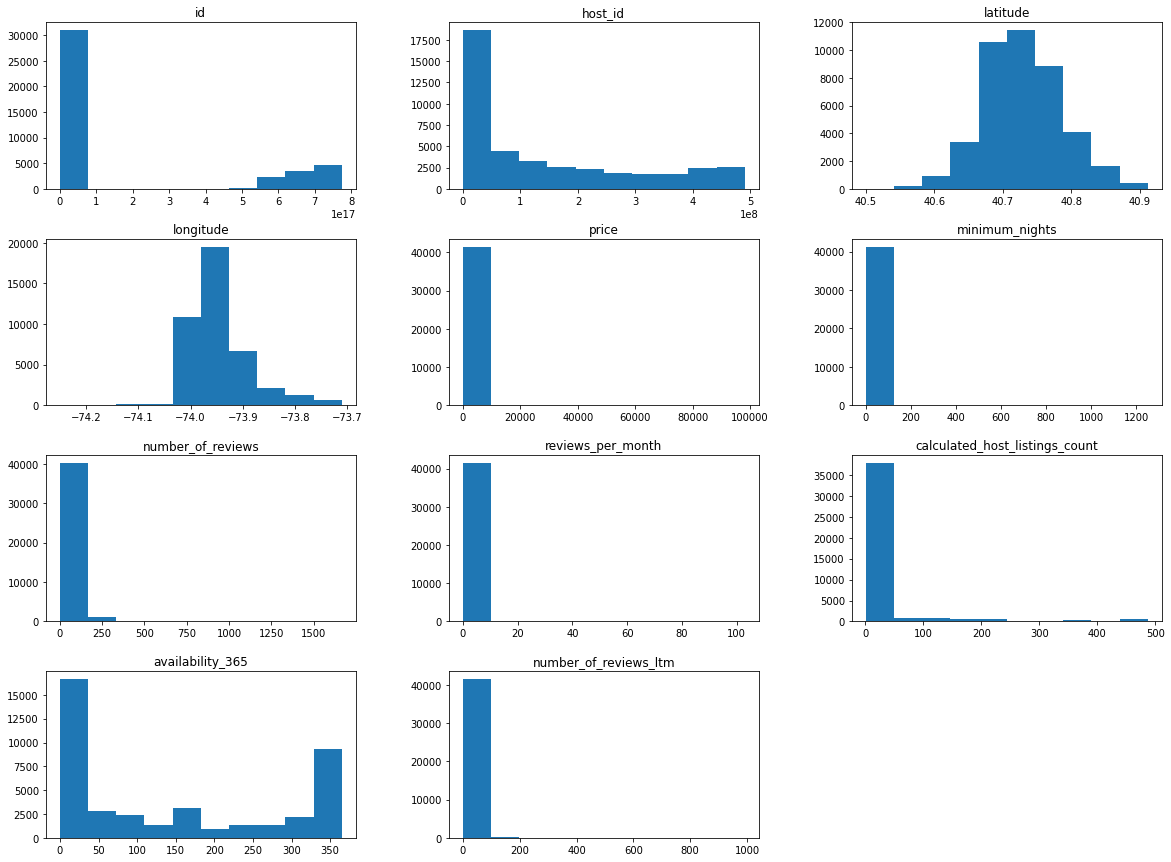

In [12]:
# Verificando a distribuição dos dados e visualização gráfica dos outliers
df.hist(figsize=(20,15), grid=False);

###**Tratando *Outliers***

Tanto para `price`e `minimum_nights`, iremos utilizar a técnica de IQR Score para aproximar os valores discrepantes de uma realidade mais próxima com a média que nos permita fazer análises mais acertivas.


####**IQR Score**

Tanto o desvio padrão quanto a variância dependem da média, portanto, são afetados por valores extremos. Mas há uma medida de dispersão baseada na mediana, que consegue contornar a presença destes outliers: a variação interquartil, abreviada para IQR em inglês.

Para descobrir a variação interquartil, primeiramente, dividimos os dados em duas metades, como na mediana, para em seguida refazer esta operação com cada uma das duas metades. Obtemos então quatro partes iguais – ou quartis.

Agora, você subtrai a mediana da metade superior (terceiro quartil ou Q3) com a mediana da metade inferior (primeiro quartil ou Q1). A vantagem deste método é que ele, por definição, já isola os outliers, seja inferiores ou superiores.

<p align="center"><img src="https://escoladedados.org/wp-content/uploads/2019/06/Captura-de-Tela-2019-06-13-a%CC%80s-14.46.46-768x374.png
", width="50%"></p>



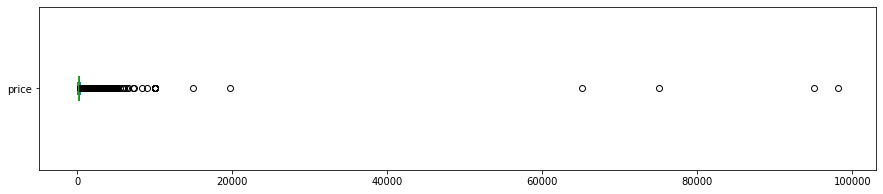

In [13]:
# Usando a variavel price como exemplo prático de ilustração 
plt.subplots(figsize=(15,3))
df.price.plot(kind='box', vert=False);


In [14]:
# Definir limites sup e inf - Price / Minimum nights

q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR da variável price: ', IQR_price)

sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Limite superior de price: ', sup_price)
print('Limite inferior de price: ', inf_price)
print("O dataset possui {} colunas".format(df.shape[0]))
print("{} Entradas acima de 430".format(len(df[df.price > 430])))
print("Representam {:.2f}% do dataset".format((len(df[df.price >430]) / df.shape[0])*100))


q1_minimum_nights = df.minimum_nights.quantile(.25)
q3_minimum_nights = df.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('IQR da variável minimum_nights: ', IQR_minimum_nights)

sup_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

print('Limite superior de minimum_nights: ', sup_minimum_nights)
print('Limite inferior de minimum_nights: ', inf_minimum_nights)
print("O dataset possui {} colunas".format(df.shape[0]))
print("{} Entradas acima de 72".format(len(df[df.minimum_nights > 72.0])))
print("Representam {:.2f}% do dataset".format((len(df[df.minimum_nights > 72.0]) / df.shape[0])*100))





IQR da variável price:  140.0
Limite superior de price:  430.0
Limite inferior de price:  -130.0
O dataset possui 41533 colunas
3217 Entradas acima de 430
Representam 7.75% do dataset
IQR da variável minimum_nights:  28.0
Limite superior de minimum_nights:  72.0
Limite inferior de minimum_nights:  -40.0
O dataset possui 41533 colunas
873 Entradas acima de 72
Representam 2.10% do dataset


In [15]:
#Entendendo a distribuição de minimun_nights em grupos
pd.cut(df['minimum_nights'], 100).value_counts(ascending=False, normalize=True)*100


(-0.249, 13.49]     50.610358
(25.98, 38.47]      44.928129
(13.49, 25.98]       1.695038
(88.43, 100.92]      1.418149
(50.96, 63.45]       0.481545
                      ...    
(750.4, 762.89]      0.000000
(762.89, 775.38]     0.000000
(775.38, 787.87]     0.000000
(787.87, 800.36]     0.000000
(625.5, 637.99]      0.000000
Name: minimum_nights, Length: 100, dtype: float64

Ainda que usando uma base estatística, podemos observar que os valores de `minimum_nights`ainda se encontram elevados, carrengando ainda um possíveis *outliers* - Vamos assumir o valor máximo de 30 dias para `minimum_nights`, uma vez que o grupo de 25 à 38 representam 44% das entradas e analisar quais os impactos dessa decisão.

In [16]:
print("O dataset possui {} colunas".format(df.shape[0]))
print("{} Entradas acima de 30".format(len(df[df.minimum_nights > 30.0])))
print("Representam {:.2f}% do dataset".format((len(df[df.minimum_nights > 30.0]) / df.shape[0])*100))

O dataset possui 41533 colunas
1930 Entradas acima de 30
Representam 4.65% do dataset


Assumindo 30 como o valor de `minimum_nights`teriamos uma menor poluição dos dados e comprometeria apenas 4,65% das entradas, um risco que pode ser assumido para maior acuracidade dos resultados no final.

###**Limpeza do *dataset***

In [17]:
df_clean = df.copy()

df_clean.drop(df_clean[df_clean.price > 430].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0.0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

print('Dimensões do Dataset antes da limpeza:',
    '\nVariáveis: ',df.shape[1], "\n"
      'Entradas: ', df.shape[0])

print('Dimensões do Dataset depois da limpeza:',
    '\nVariáveis: ',df_clean.shape[1], "\n"
      'Entradas: ', df_clean.shape[0])

#print("Os dados alterados representam {:.2f}% do dataset"df.shape[1]

Dimensões do Dataset antes da limpeza: 
Variáveis:  16 
Entradas:  41533
Dimensões do Dataset depois da limpeza: 
Variáveis:  16 
Entradas:  36506


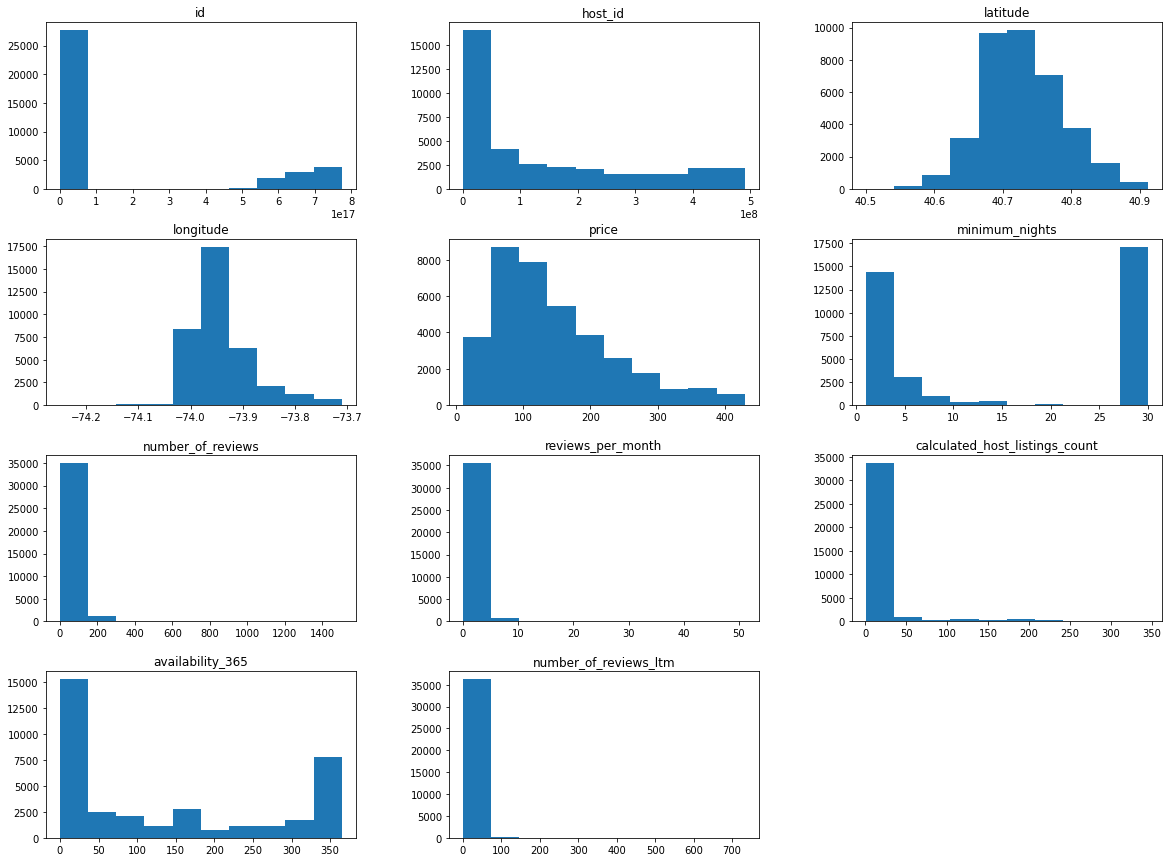

In [18]:
# Verificação do conjunto após limpeza
df_clean.hist(figsize=(20,15), grid=False);

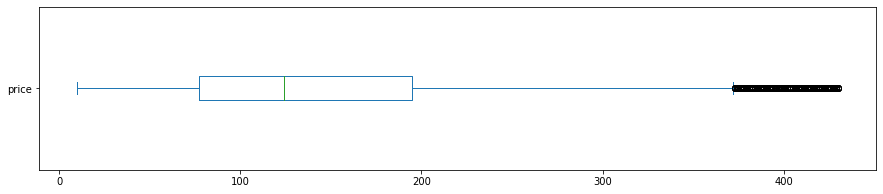

In [19]:
plt.subplots(figsize=(15,3))
df_clean.price.plot(kind='box', vert=False);

Após limpeza é possível perceber nos gráficos uma condição muito mais satisfatória com uma redução significativa de *outliers* também é possível confirmar uma grande tendência à anúncios com `minimun_nights` de 30 dias. E por fim, podemos ver abaixo que os dados númericos em `price`e `minimum_nights`agora estão normalizados, trazendo seus valores máximos mais próximos de Q3 e média mais próxima de Q2 

In [20]:
df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe().round(1)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,36506.0,36506.0,36506.0,36506.0,36506.0,36506.0
mean,145.2,15.8,27.7,1.0,12.1,136.7
std,88.2,13.6,56.1,1.6,37.0,143.0
min,10.0,1.0,0.0,0.0,1.0,0.0
25%,77.0,2.0,1.0,0.0,1.0,0.0
50%,124.0,7.0,6.0,0.3,1.0,77.0
75%,195.0,30.0,27.0,1.5,3.0,305.0
max,430.0,30.0,1503.0,51.0,345.0,365.0


##Analisando Dados

In [21]:
# Antes da análise propriamente dita, vamos separar alguns conjuntos de dados

#valores únicos para neigbourhood_group
df_clean.neighbourhood_group.unique()


array(['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

In [22]:
#valores únicos para room_type
df_clean.room_type.unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

####**Preço por Região**

In [23]:
df_clean.groupby(['neighbourhood_group']).price.mean().round(2).sort_values(ascending=False)

neighbourhood_group
Manhattan        173.22
Brooklyn         136.36
Staten Island    117.27
Queens           113.60
Bronx            108.33
Name: price, dtype: float64

Text(0.5, 1.0, 'Densidade e distribuição dos preços para cada neighberhood_group')

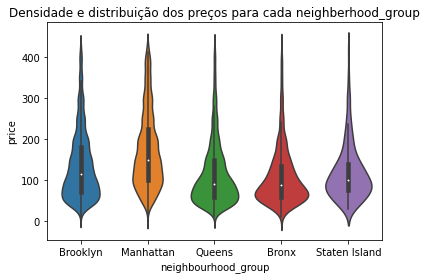

In [24]:
viz=sns.violinplot(data=df_clean, x='neighbourhood_group', y='price')
viz.set_title('Densidade e distribuição dos preços para cada neighberhood_group')

Com essa vizualização podemos concluir que as regiões "Queens","Bronx" e "Staten Islande" tem uma distribuição muito similar entre elas, mantendo sua média próximo à 100,00 dolares/noite e tendo os valores mais baixos na casa de 50,00/noite e ainda assim Staten Island mostra ser a região com quastos mais baratos entre eles, já "Brooklyn" apresenta ter a maior disperção entre os dados variando de de 60,00 à 150,00 dolares/noite aproximadamente e por fim temos "Manhattan" como a região mais cara onde sua média se encontra próxima ao valor Max de "Brooklyn"  

In [25]:
df_clean.groupby(['neighbourhood']).price.mean().round(2).sort_values(ascending=False)[:10]

neighbourhood
Willowbrook           329.00
Neponsit              293.50
Financial District    253.36
Spuyten Duyvil        251.75
NoHo                  224.71
DUMBO                 224.30
Belle Harbor          223.86
Midtown               223.18
Todt Hill             220.33
Bergen Beach          217.47
Name: price, dtype: float64

In [26]:
print(df_clean[df_clean.neighbourhood == "Willowbrook"].shape)

df_clean[df_clean.neighbourhood == "Willowbrook"]

(1, 16)


,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
14439,27088022,Bright and Spacious Gorgeous Home,103450258,Staten Island,Willowbrook,40.59919,-74.13389,Entire home/apt,329,4,43,2022-11-09,0.81,3,239,16


In [27]:
print(df_clean[df_clean.neighbourhood == "Neponsit"].shape)

df_clean[df_clean.neighbourhood == "Neponsit"]

(2, 16)


,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
10910,19274199,Luxurious Country Beach Surf Loft,62608664,Queens,Neponsit,40.57068,-73.86126,Entire home/apt,292,2,46,2022-08-21,0.69,1,364,4
13693,24910361,"""The Little House by the Sea""",188328775,Queens,Neponsit,40.56948,-73.85941,Entire home/apt,295,2,27,2022-11-20,0.50,1,88,4


Após navegarmos um pouco mais fundo encontramos que os bairros "Willowbrook" e "Neponsit" (Staten Island e Queens) respectivamente, possuem as maiores médias de preço, porém como ilustrado acima isso ocorre por conta da baixa quantidade de anúncios em ambos bairos. Já os demais bairros listados pertencem às regiões mais caras (Manhattan e Broklyn) como já tinhamos analisado anteriormente.

####**Correlações**

A matriz de correlação mostra os valores de correlação de Pearson, que medem o grau de relação linear entre cada par de variáveis. Os valores de correlação podem cair entre -1 e +1. Se as duas variáveis tendem a aumentar e diminuir juntas, o valor de correlação é positivo. Se uma variável aumenta enquanto a outra variável diminui, o valor de correlação é negativo.

In [28]:
# Análise de correlçao
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365','latitude','longitude']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,latitude,longitude
price,1.000000,-0.193228,0.010787,0.080681,-0.007567,0.103331,0.006323,-0.234335
minimum_nights,-0.193228,1.000000,-0.256621,-0.497426,0.145446,-0.244559,0.080376,-0.190186
number_of_reviews,0.010787,-0.256621,1.000000,0.526992,-0.088062,0.102226,-0.044556,0.039676
reviews_per_month,0.080681,-0.497426,0.526992,1.000000,-0.070157,0.243345,-0.060433,0.133406
calculated_host_listings_count,-0.007567,0.145446,-0.088062,-0.070157,1.000000,0.130376,0.083844,-0.041752
availability_365,0.103331,-0.244559,0.102226,0.243345,0.130376,1.000000,-0.017994,0.164654
latitude,0.006323,0.080376,-0.044556,-0.060433,0.083844,-0.017994,1.000000,0.062666
longitude,-0.234335,-0.190186,0.039676,0.133406,-0.041752,0.164654,0.062666,1.000000


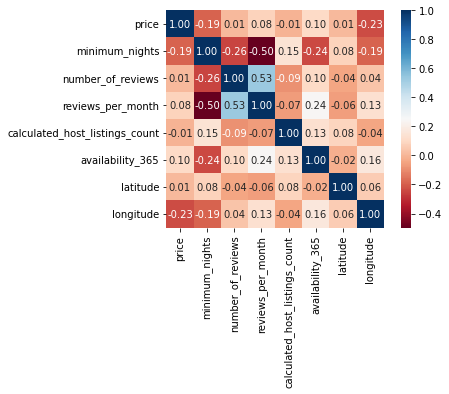

In [29]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

À princípio não é possível notar nenhuma correlação forte entre as variáveis apenas uma mínima tendência de que quartos com `minimum_nights`de poucos dias tem menos `review_per_month`, mas isso não nos traz nenhum *insight* relevante.

Vamos agora avaliar os tipos de imóveis (`room_type`) que mais possuem anúncios e os imóveis que possuem mais avaliações para ver se encontramos alguma relação para nossa análise.

In [30]:
# Tipos de Imóveis em percentual
df_clean.room_type.value_counts() / df_clean.shape[0]*100

Entire home/apt    55.319673
Private room       43.116200
Shared room         1.323070
Hotel room          0.241056
Name: room_type, dtype: float64

In [31]:
# Relação de Custos
df_clean.groupby(['room_type']).price.mean().round(2).sort_values(ascending=False)[:10]

room_type
Hotel room         254.82
Entire home/apt    186.56
Private room        93.47
Shared room         83.33
Name: price, dtype: float64

In [35]:
# Lista dos 10 imóveis mais avaliados
top_reviewed_listings=df_clean.nlargest(10,'number_of_reviews')
top_reviewed_listings

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
18534,37122502,Amazing Micro Unit W/ communal rooftop and kit...,266755066,Manhattan,East Village,40.72380,-73.99038,Private room,276,1,1503,2022-12-04,40.40,4,345,733
18527,37122162,Beautiful Standard Full Room at The Ridge,266755066,Manhattan,Lower East Side,40.72259,-73.98841,Private room,229,1,918,2022-12-02,26.53,4,328,299
7604,12502633,Entire New Apartment in Park Slope / Gowanus,379619,Brooklyn,Gowanus,40.66714,-73.99411,Private room,117,1,765,2022-11-29,9.50,1,4,95
25869,49946715,S+ Location Midtown Studio Apt,341752262,Manhattan,Midtown,40.74640,-73.98701,Entire home/apt,285,1,750,2022-11-20,40.47,13,308,457
9068,15262831,THE PRIVACY DEN ~ 5 MINUTES TO JFK,97086824,Queens,Jamaica,40.66946,-73.76679,Entire home/apt,59,1,749,2022-11-16,9.95,1,138,71
17361,34072045,King Room City,259169672,Manhattan,Midtown,40.74623,-73.98499,Hotel room,233,1,744,2022-11-12,18.93,10,70,7
1301,1217318,Williamsburg Penthouse Hideaway,6642777,Brooklyn,Williamsburg,40.71165,-73.95236,Private room,90,1,724,2022-12-02,6.27,2,87,112
2612,3798941,Williamsburg Penthouse Guestroom,6642777,Brooklyn,Williamsburg,40.71067,-73.95250,Private room,93,1,723,2022-11-20,7.14,2,63,106
11288,20196339,Private Guest Suite-Separate Entrance-JFK 10 min,7097558,Queens,South Ozone Park,40.67022,-73.79361,Entire home/apt,79,1,639,2022-11-27,9.85,1,75,112
1096,945297,East Village Gay Friendly Dbl Room,5074654,Manhattan,East Village,40.73024,-73.98147,Private room,100,1,638,2022-11-17,5.39,1,237,87


In [40]:
media_preço=top_reviewed_listings.price.mean()
print('Média de custo por noite para imóveis com maior número de avaliações: {}'.format(media_preço))

Média de custo por noite para imóveis com maior número de avaliações: 156.1


In [41]:
media_noites=top_reviewed_listings.minimum_nights.mean()
print('Média de "minimum_nights" para imóveis com maior número de avaliações: {} noite'.format(media_noites))

Média de "minimum_nights" para imóveis com maior número de avaliações: 1.0 noite


In [42]:
df_clean.minimum_nights.mean()

15.781624938366296

In [64]:
# Quantos valores de entrada com minimum_nights = 30 dias em porcentagem
df_clean.loc[df_clean['minimum_nights']==30].shape[0] / df_clean.shape[0]*100

46.414288062236345

Mais uma vez não encontramos indícios de correlação dos dados, os imóveis de `room_type`que possuem maior número de anúncios tem seu preço médio muito próximo da média geral de preços, única coisa que é possível perceber neste ponto é que os preços de hoteis anúnciados na plataforma tem seu custo por noite 60% acima da média dos demais imóveis anunciados (o que é justificado pela estrutura necessária para manter um hotel e as comodidades encontradas quando se hospeda em um). Outro ponto que não se nota qualquer relação é dos quartos que possuem mais quantidade de avaliações com relação à seu preço, até por que nesta base de dados temos disponível apenas a quantificação de avaliações e não conseguimos inferir se são positivas ou negativas, ainda com relação aos imóveis que mais possuem avaliação, é possível notar que 6/10 deles são "Privete Room" e que a média de `minimum_nights` dos 10 imóveis com mais avaliações é de 01 noite, já a média geral do *dataset* é de 15 noites.

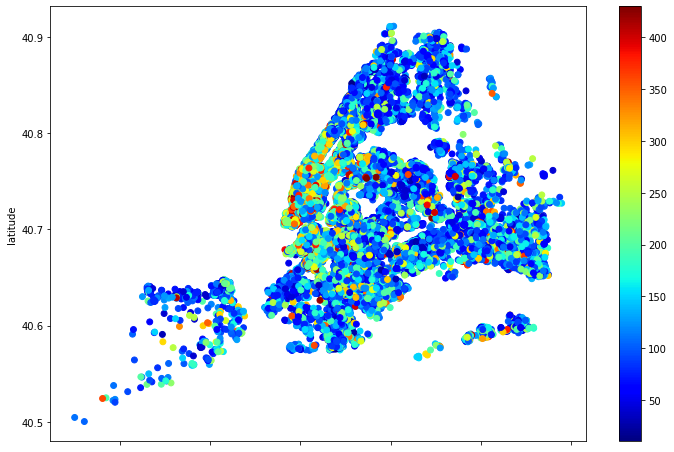

In [43]:
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=1, c=df_clean['price'], s=35,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

##Conclusão

Durante análise foi possível observar uma grande quantidade de registros (41533) o que nos possibilitou investigar de forma exploratória os diversos dados presentes, primeiramente pudemos verificar que aproximadamente 12% dos dados possuiam *outliers*, optamos por elimina-los para obter um resultado mais próximo da realidade. Foi verificado que a média de custo para aluguel de um imóvel é de 145,20 e que Manhattan é região mais cara apresentando uma média de custo de 173,22. Também foi verificado que que a maioria dos quartos postados na plataforma são do modelo de apartamento inteiro (55,31%) e na opção de aluguel de quarto (43,11%) outro ponto que me chamou atenção é que existe uma grande quantidade (46,41%) de anúncios com `minimum_nights`de 30 dias comportamente que pelo que notei não é tão comum no Brasil e isso também acaba jogando a média dessa coluna para cima, com o valor médio de 15 noites mínimas. Infelizmente com uma análise preliminar não foi possível notar nenhuma correlação direta entre os dados, acredito que seria legal se tivessemos algumas informações extras no *dataset* para uma investigação maior, como por exemplo o *rate* das avaliações.
